### 군집화 평가 방법

- 군집화의 평가 방법으로 실루엣 분석이 있음

- 실루엣 분석은 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타냄

- 효율적으로 잘 분리되었다는 것은 군집간 거리는 떨어져 있고, 동일 군집끼리를 잘 뭉쳐져 있음을 의미

<div align='center'>

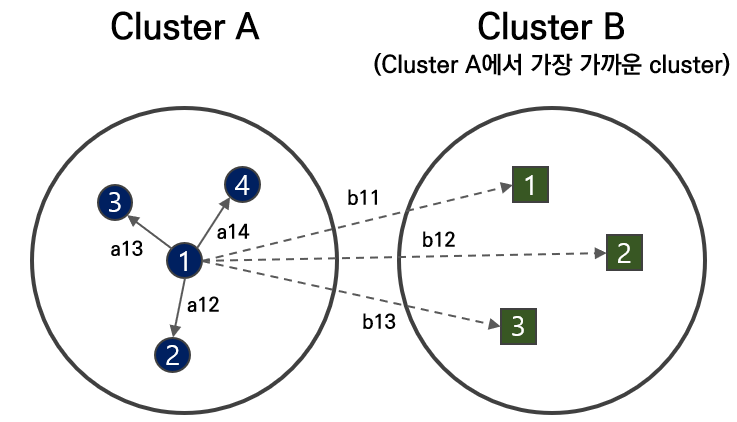

($kij=$ k 클러스터의 점 i에서부터 j까지의 거리<br>
ex.$a12=$ a 클러스터의 점 1부터 점 2까지의 거리)

</div>

1. 각 데이터 포인트의 응집도(cohesion) 계산
  - 응집도는 데이터 포인트와 같은 군집에 속한 다른 데이터 포인트들 사이의 평균 거리
  - 상기 예시에서 $cohesion=a(i)={1 \over 3}(a12+a13+a14)$
  - 즉, 같은 클러스터 내의 데이터 포인트끼리 얼마나 가까운지를 측정

2. 각 데이터 포인트의 분리도(separation) 계산
  - 분리도는 데이터 포인트와 가장 가까운 다른 군집의 모든 데이터 포인트 사이의 평균 거리
  - 상기 예시에서 $separation=b(i)={1 \over 3}(b11+b12+b13)$
  - 즉, 해당 데이터 포인트가 다른 군집과 얼마나 떨어져 있는지를 측정

3. 응집도와 분리도를 사용하여 각 데이터 포인트의 실루엣 계수 계산
  - $silhouette\;coefficient=s(i)={b(i)-a(i) \over \max{(a(i), b(i)})}$
  - 정규화를 위하여 분리도와 응집도의 차를 $\max{(a(i), b(i))}$로 나눔
  - -1에서 1사이의 값을 가지며, 1에 가까워질수록 근처 군집과 더 멀리 떨어져 있다는 뜻이며, 0에 가까울수록 근처 군집과 가깝다는 의미
  - 음수가 나온다는 것은 아예 다른 군집에 데이터 포인트가 할당되었음을 의미
  - 개별 데이터 포인트 실루엣 계수의 평균을 계산하여 최종 산출

- 좋은 군집을 위해선 다음 기준을 만족해야 함
  - 전체 실루엣 계수의 평균 값이 0~1사이의 값을 가지며, 1에 가까울수록 좋음
  - 전체 실루엣 계수의 평균과 각각의 군집별 실루엣 계수의 평균값의 편차가 크지 않아야 함

### 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# iris 데이터셋을 로드
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# iris 데이터를 데이터프레임으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

# KMeans 알고리즘으로 클러스터링을 수행(n_init: 초기 중심점 설정 횟수)
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0).fit(irisDF)

# 클러스터링 결과를 iris 데이터프레임에 추가
irisDF['cluster'] = kmeans.labels_

# 각 데이터 포인트에 대한 실루엣 계수를 계산
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# 실루엣 계수를 iris 데이터프레임에 추가
irisDF['silhouette_coeff'] = score_samples

# 전체 데이터에 대한 평균 실루엣 계수를 계산
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

# 데이터프레임의 첫 3개 행을 출력
irisDF.head(10) # 여기에서 나오는 silhouette_coeff들은 Data 하나 하나의 개별 실루엣 수치이다. 당연히 전체 Data의 평균을 낸 average_score랑 다르다. 

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


C:\Users\dlwhd\Anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()  # 1번의 실루엣 계수값이 가장 높음

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [ ]:
### [부록] 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, n_init=10, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

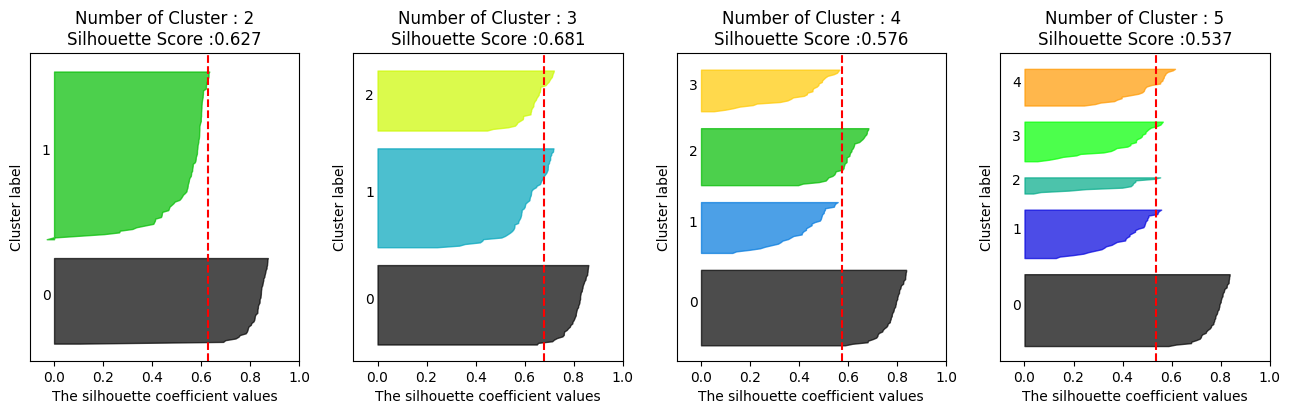

In [ ]:
iris = load_iris()
visualize_silhouette([ 2, 3, 4, 5 ], irisDF)

# 해석
### 실루엣 계수가 크다 = Data 점 하나가 자기 군집 중심점이랑은 가깝고, 다른 군집의 중심점과는 거리가 멂.
#### 전체 실루엣 계수가 크다고 무조건 좋은 것은 X, 말 그대로 전체 평균이기 때문에 특정 군집의 실루엣만 높으면 평균치가 높아질 수 있다. <br> 
#### 점선 : 전체 실루엣 계수 평균, X축 : 실루엣 계수
군집의 개수가 2일 때 : 초록색(군집 1)의 실루엣 계수가 평균보다 작다.군집 1의 모든 데이터가 평균 실루엣 계수 이하이다.(y축을 x축처럼 봐서 직선이 무한개 채워져 면적을 이룬다고 보면 쉽다.-정적분 활용 처럼-) <br>
0번 군집은 모든 Data가 전체 평균 실루엣 계수보다 크다.
<br><br>
군집의 개수가 5일 때 : 군집 1,2,3,4는 전평실(전체평균실루엣)보다 큰 Data가 어느 정도 균일하게 있고, 군집 0은 모든 Data가 전평실보다 크다.<br><br>

따라서, 전평실보다 큰 Data 들의 편차가 크지 않은 군집수 3이 가장 효율적이라고 볼 수 있다.